#Biblioteca para Avaliação de Software
Alunos: Gabriel da Silva Freitas, Gabriel Luciano Nunes


Emails:
  gabriel.freitas@icomp.ufam.edu.br, gabriel.luciano@icomp.ufam.edu.br




In [64]:
import numpy
import scipy
import csv
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

#Média Aritmética

In [65]:
def Media_aritmetica(*argv):
  media = 0
  for arg in argv:
    media = media+arg
  return media/len(argv)

In [66]:
Media_aritmetica(5,4,2,6,7,8,3)

5.0

In [67]:
def Mediana(*argv):
  ordenados = list(argv)
  ordenados.sort()
  n = len(ordenados)
  if n % 2 == 0:
    return (ordenados[n//2] + ordenados[(n//2)-1]) / 2
  else:
    return ordenados[n//2]

In [68]:
Mediana(108, 103, 252, 121, 93, 57, 40, 53, 22, 116, 98)

98

#Moda

In [69]:
def Moda(*argv):
  dist = [0] * (max(argv)+1)
  modas = []
  for i in argv:
    dist[i] += 1
  quant_moda = max(dist)
  for i in range(len(dist)):
    if dist[i] == quant_moda:
      modas.append(i)
  if len(modas) == 1:
    return modas[0]
  return modas

In [70]:
Moda(1,2,3,2,4,4)

[2, 4]

#Média Geométrica

In [71]:
def Media_geometrica(*argv):
  media = 1
  for arg in argv:
    media*= arg
    #print(media)
  return media**(1/(len(argv)))

In [72]:
Media_geometrica(3,12,16,36)

12.0

In [73]:
def Media_harmonica(*argv):
  k = len(argv)
  soma = 0
  for i in argv:
    soma += 1/i
  return round(k/soma, 2)

In [74]:
Media_harmonica(2,3,5,6,9)

3.81

#Média Ponderada

Colocar na entrada da função o valor seguido de seu peso

In [75]:
def Media_ponderada(*argv):
  soma = 0
  soma_pesos = 0
  for i in range(0,len(argv),2):
    soma = soma+argv[i]*argv[i+1]
    soma_pesos = soma_pesos+argv[i+1]
  return soma/soma_pesos

In [76]:
Media_ponderada(8,1,4,2,7,3)

6.166666666666667

#Média de Taxas

In [77]:
def Media_taxas(*argv):
  soma = 0
  for i in range(0,len(argv)//2):
    soma = soma+argv[i]
  media1 = soma/(len(argv)/2)
  #print(media1)
  soma = 0
  for i in range((len(argv)//2),len(argv)):
    soma = soma+argv[i]
  media2 = soma/(len(argv)/2)
  #print(media2)
  return round(media1/media2 * 100, 2)

In [78]:
Media_taxas(3, 5, 4.2, 5.2, 8.6, 100, 100, 100, 100, 100)

5.2

#Amplitude

In [79]:
def Amplitude(*argv):
  return max(argv) - min(argv)

In [80]:
Amplitude(6,8,9,2,3,1)

8

#Desvio padrão

In [81]:
def Variancia(*argv):
  media = Media_aritmetica(*argv)
  variancia = 0
  for valor in argv:
    variancia +=  (valor - media) ** 2
  return round(variancia / (len(argv)-1), 2)

def Desvio_padrao(*argv):
  return round(Variancia(*argv) ** (1/2), 2)

In [82]:
Variancia(4,5,2,7,6)

3.7

In [83]:
Desvio_padrao(4,5,2,7,6)

1.92

#Coeficiente de variação

In [84]:
def Coeficiente_variacao(*argv):
  return round(Desvio_padrao(*argv) / Media_aritmetica(*argv) * 100, 2)

In [85]:
Coeficiente_variacao(14,14,15,15,16,16)

5.93

#Quartis

In [86]:
def Quartis(*argv):
  quartis = []
  amostra = list(argv)
  amostra.sort()

  segundo_quartil = Mediana(*amostra)
  if len(argv) % 2 == 0:
    primeiro_quartil = Mediana(*amostra[:len(amostra)//2])
    terceiro_quartil = Mediana(*amostra[len(amostra)//2:])
  else:
    primeiro_quartil = Mediana(*amostra[:len(amostra)//2+1])
    terceiro_quartil = Mediana(*amostra[len(amostra)//2:])

  quartis = [primeiro_quartil, segundo_quartil, terceiro_quartil]
  return quartis

In [87]:
Quartis(1,2,3,4,5,6,7,8,9)

[3, 5, 7]

#Amplitude interquartil

In [88]:
def Amplitude_interquartil(*argv):
  quartis = Quartis(*argv)
  return quartis[2] - quartis[0]

In [89]:
Amplitude_interquartil(1,2,3,4,5,6,7,8,9)

4

#Intervalo de confiança

In [90]:
def Intervalo_confianca(*argv):
  media = Media_aritmetica(*argv[:-1])
  desvio_padrao = Desvio_padrao(*argv[:-1])
  nivel_confianca = argv[-1]
  tam = len(argv)-1
  if(tam > 30):
    z = scipy.stats.norm.ppf((1-(100-nivel_confianca)/200))
    margem = (desvio_padrao * z) / (tam ** (1/2))
  else:
    t = scipy.stats.t.ppf((1-(100-nivel_confianca)/200), tam-1)
    margem = ((desvio_padrao * t) / (tam ** (1/2)))
  return(media - margem, media+margem)

In [91]:
Intervalo_confianca(177, 122, 128, 191, 180, 142, 197, 196, 67, 160,
167, 138, 107, 188, 102, 116, 138, 114, 188, 176,
148, 175, 169, 203, 135, 142, 168, 181, 168, 150,
132, 196, 88, 177, 164, 118, 178, 102, 156, 114, 90)

(142.61788037387302, 160.28211962612696)

#Teste de média zero

In [92]:
#argumentos: amostra 1, amostra 2, tamanho amostra 1, tamanho amostra 2, nível de confiança.
def Media_zero(*argv):
  amostra_diferencas = []
  for i in range(argv[-3]):
    amostra_diferencas.append(argv[i] -argv[i+argv[-2]])
  amostra_diferencas.append(argv[-1])
  ic = Intervalo_confianca(*amostra_diferencas)
  print(amostra_diferencas)
  if ic[0] <= 0 and ic[1] >= 0:
    return True
  return False

def Media_zero_diferenca(*argv):
  ic = Intervalo_confianca(*argv)
  print(ic)
  if ic[0] <= 0 and ic[1] >= 0:
    return True
  return False

In [93]:
Media_zero_diferenca(1, 1, 1, 1, 90)

(1.0, 1.0)


False

#Exercício 1
Enunciado:
Encontrar a distribuição de frequência para estudantes de uma turma
de ICC. Construa um histograma para representar graficamente a
distribuição.

59 61 74 84 86 75 96 92 53 66
58 49 71 72 73 66 91 68 79 79
64 84 86 79 88 59 98 82 69 75
84 61 92 84 82 62 61 88 74 58

In [94]:
lista = [59, 61, 74, 84, 86, 75, 96, 92, 53, 66, 58, 49, 71, 72, 73, 66, 91, 68, 79, 79, 64, 84, 86, 79, 88, 59, 98, 82, 69, 75, 84, 61, 92, 84, 82, 62, 61, 88, 74, 58]
bins = range(0, 101, 10)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 3, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 3, 0, 0, 2, 0, 4, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1]


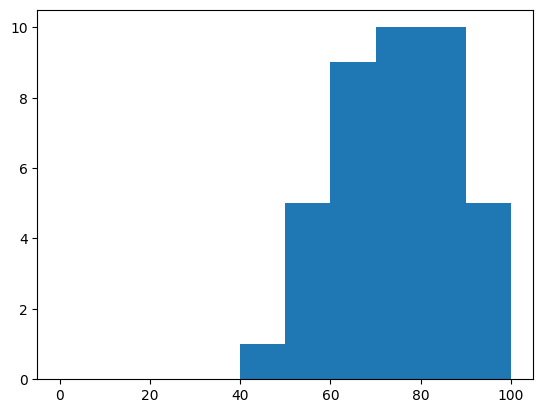

In [95]:
histograma = [0]*max(lista)
len(histograma)
for i in lista:
  histograma[i-1] += 1

print(histograma)

plt.hist(lista, bins)

plt.show()

#Exercício 2:
Um homem precisava fazer um reparo e comprou 80m de arame por Rs 40,00. Um tempo depois, ele precisou comprar mais 40m e
pagou Rs 45,00. Posteriormente, comprou mais 12m por R$ 50,00.
Quanto ele pagou, em média, por cada metro de arame?

In [96]:
Media_taxas(40,45,50,80,40,12)/100

1.0227

Utilizando a média das taxas para cada valor apresentado, a média gerada foi R$ 1,02 reais para cada metro do arame.
Para calcular essa média a seguinte algoritmo foi feita pelo programa  Media_taxas:

Total de taxas: 3

Metros do arame: 80, 40, 12

Valor de cada metro respectivamente: 40, 45, 50

Aplicando na fórmula de média das taxas fica:((40+45+50)÷3)÷((80+40+12)÷3)

Calculando essa fórmula a resposta fica: 1.0227


#Exercício 3 - Amplitude

Calcular a amplitude das amostras dos grupos Y, Z, W e V.

Grupo X: 3, 4, 5, 6, 7

Grupo Y: 1, 3, 5, 7, 9

Grupo Z: 5, 5, 5, 5, 5

Grupo W: 3, 5, 5, 5, 7

Grupo V: 3, 5, 5, 6, 6

In [97]:
#Para o grupo X:
Amplitude_X = Amplitude(3,4,5,6,7)
print("Amplitude de X: ", Amplitude_X)
#Para o grupo Y:
Amplitude_Y = Amplitude(1, 3, 5, 7, 9)
print("Amplitude de Y: ", Amplitude_Y)
#Para o grupo Z:
Amplitude_Z = Amplitude(5,5,5,5,5)
print("Amplitude de Z: ", Amplitude_Z)
#Para o grupo W:
Amplitude_W = Amplitude(3,5,5,5,7)
print("Amplitude de W: ", Amplitude_W)
#Para o grupo V:
Amplitude_W = Amplitude(3,5,5,6,6)
print("Amplitude de V: ", Amplitude_W)

Amplitude de X:  4
Amplitude de Y:  8
Amplitude de Z:  0
Amplitude de W:  4
Amplitude de V:  3


Para calular cada amplitude dos grupos dados, foi realizado uma subtraçao entre o maior número do grupo e o menor número do grupo.

Por exemplo, no  grupo W, temos o menor número o 3 e o maior, 7.

Subtraindo esses números fica: 7-3 = 4.

Logo a amplitude de W é 4.

#Exercício 4 - Amplitude




Exercício
Um aplicativo foi desenvolvido para registrar o tempo T que o
celular de um usuário está próximo do celular de outro usuário.
Valores da duração de alguns desses contatos (em segundos):

23,17,18,32,19,27,22,16,24,29

a) Calcule a amplitude dessa amostra.


In [98]:
# amostras na entrada da função amplitude 23,17,18,32,19,27,22,16,24,29
amplitude_amostras = Amplitude(23,17,18,32,19,27,22,16,24,29)
print("A amplitude é: ", amplitude_amostras)

A amplitude é:  16


Para calcular a amplitude da amostra dada, foi necessário primeiro encontrar o mínimo e o máximo valor da lista de números.

Os valores encontrados de máx e mín respectivamente são 32 e 16. Logo a amplitude é 32-16 = 16.


 b) Suponha que dois usuários não se viam há muito tempo e o aplicativo registrou 1200 segundos de duração do contato. A amostra ficou assim:

23,17, 18, 32, 19, 27, 22, 16, 24, 1200

Calcule a amplitude dessa amostra.


O que podemos dizer sobre essa segunda amostra?

In [99]:
Amplitude_amostras2 = Amplitude(23,17, 18, 32, 19, 27, 22, 16, 24, 1200)
print("A amplitude é: ", Amplitude_amostras2)

A amplitude é:  1184


Como houve uma maior duração de tempo de contato, temos uma amplitude maior.

O último valor inserido na lista foi 1200 e é o valor máximo. O mínimo permanece 16.

Calculando a amplitude, temos 1200-16 = 1984.

#Exercício 5 - Desvio Padrão

O analista de redes de uma empresa coletou uma amostra do tempo
(em segundos) de acesso a uma página web que alguns usuários
observaram em dois dias consecutivos. As observações do primeiro dia
foram {45, 74, 56, 98, 32, 97} e as do segundo dia foram {48, 81, 33, 40,
84}. Ache a variância amostral e o desvio-padrão de cada amostra. Faça
uma análise comparativa.

In [100]:
#Para o primeiro dia temos os seguintes valores de variância e desvio padrão:
# primeiro_dia = [45, 74, 56, 98, 32, 97]
variancia_1dia = Variancia(45, 74, 56, 98, 32, 97)
print("Variancia do primeiro dia: ", variancia_1dia)

DP_1dia = Desvio_padrao(45, 74, 56, 98, 32, 97)
print("Desvio padrão do primeiro dia: ", DP_1dia)

print("-----------------------------------------------------------")
#Para o Segundo dia temos os seguintes valores de variância e desvio padrão:
# primeiro_dia = [45, 74, 56, 98, 32, 97]
variancia_2dia = Variancia(48, 81, 33, 40, 84)
print("Variancia do primeiro dia: ", variancia_2dia)

DP_2dia = Desvio_padrao(48, 81, 33, 40, 84)
print("Desvio padrão do primeiro dia: ", DP_2dia)

Variancia do primeiro dia:  748.0
Desvio padrão do primeiro dia:  27.35
-----------------------------------------------------------
Variancia do primeiro dia:  562.7
Desvio padrão do primeiro dia:  23.72


Ao analizarmos os dados, percebemos que temos um acesso a mais ao site pelo primeiro dia.

Isso influenciou no calculo da variância já que no primeiro dia temos um valor maior na variância. Por consequência temos também um valor mais alto no Desvio Padrão do primeiro dia.

No segundo dia, temos menos acesso ao site e por consequência um valor menor da variância e do Desvio Padrão.

#Exercício 6 - Coeficiente de Variação
Um psicultor mediu o tamanho de alguns peixes a fim de monitorar a
condição ideal para o consumo.

[texto do link](https://)A amostra apresentou os seguintes
valores em cm: 76,102,12,39,55,93,98,53,102. Verifique se o tamanho
médio é representativo.


In [101]:
Coeficiente_variacao(76,102,12,39,55,93,98,53,102)

45.84

Como o grau de variação resultou em 45.84 e esse valor é menor que 50

*45.84 < 50*

Logo, essa valor é altamente representativo para os dados de entrada

#Exercício 7 - Quartis, Amplitude Interquartil e Diagrama em Caixa
O seguinte dataset contém dados sobre os Vingadores da Marvel

https://github.com/fivethirtyeight/data/tree/master/avengers

Selecione os dados da coluna sobre as aparições e encontre as
estatísticas estudadas até aqui.

In [102]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv

--2023-08-16 11:57:18--  https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27638 (27K) [text/plain]
Saving to: ‘avengers.csv.1’

avengers.csv.1      100%[===================>]  26.99K  --.-KB/s    in 0.002s  

2023-08-16 11:57:18 (17.5 MB/s) - ‘avengers.csv.1’ saved [27638/27638]



In [103]:
#Abrindo o data set
import pandas as pd

tabela = pd.read_csv("avengers.csv", sep=",",  encoding='latin-1')
#display(tabela)

aparicoes = []
tamanho_tabela = (len(tabela.index))
for i in range(0, tamanho_tabela):
  aparicoes.append(tabela.iloc[i][2])

print(aparicoes)


[1269, 1165, 3068, 2089, 2402, 612, 3458, 1456, 769, 1214, 115, 741, 780, 1036, 482, 1112, 160, 1886, 332, 557, 197, 106, 692, 109, 100, 132, 108, 100, 156, 254, 935, 576, 141, 355, 933, 348, 206, 533, 374, 2, 2305, 83, 402, 352, 565, 112, 218, 149, 168, 1561, 217, 158, 86, 41, 68, 70, 61, 2125, 1761, 293, 36, 22, 31, 34, 33, 4, 47, 7, 3, 16, 575, 58, 237, 4333, 126, 158, 355, 517, 202, 31, 28, 50, 27, 18, 302, 330, 101, 43, 126, 24, 886, 159, 3130, 241, 67, 23, 103, 123, 110, 160, 132, 121, 59, 629, 1324, 236, 663, 525, 205, 108, 359, 299, 333, 88, 369, 380, 545, 6, 126, 417, 31, 310, 40, 26, 63, 2, 73, 22, 153, 73, 59, 66, 43, 55, 108, 64, 62, 94, 18, 81, 1598, 1375, 746, 561, 592, 679, 491, 65, 55, 44, 65, 877, 176, 24, 25, 35, 44, 78, 22, 77, 115, 77, 69, 173, 75, 12, 14, 13, 198, 29, 45, 49, 35]


In [104]:
############################################################### CALCULANDO MEDIDAS DE ESTATÍSTICAS ##########################################################################3

#Média aritmética
print("Média aritmética: ", round(Media_aritmetica(*aparicoes),2))

#Média geométrica
#print("Média geométrica: ", round(Media_geometrica(*aparicoes),2))

#Mediana
print("Mediana: ", round(Mediana(*aparicoes),2))

#Moda
print("Moda: ", Moda(*aparicoes))

#amplitude
print("Amplitude: ", Amplitude(*aparicoes))

#variância
print("Variância: ", Variancia(*aparicoes))

#Desvio Padrão
print("Desvio Padrão: ", Desvio_padrao(*aparicoes))

#Coeficiente de variação
print("Coeficiente de variação: ", Coeficiente_variacao(*aparicoes))

#Quartis
print("Quartis: ", Quartis(*aparicoes))

#Amplitude interquartil
print("Amplitude Interquartil: ", Amplitude_interquartil(*aparicoes))

Média aritmética:  414.05
Mediana:  132
Moda:  [22, 31, 108, 126]
Amplitude:  4331
Variância:  459673.08
Desvio Padrão:  677.99
Coeficiente de variação:  163.75
Quartis:  [58, 132, 491]
Amplitude Interquartil:  433


A média gerada foi de 414.05, não era conveniente esse caso usar outras métricas de média, já que este não possui taxas, nem valores distintos de uma variável

A **mediana** foi de 132 e na **moda** tivemos quatro valores que foram mais vezes repetidos.

A **amplitude** obteve um valor bem alto, de 4331 de diferença.

A **variância** foi de 459673.08 e o **desvio padrão** foi de 677.99.

O **coeficiente de variação** foi de 163.75 e os três quartiz foram 58,132 e 491. Observamos que esse último quartil teve uma diferença bem maior em relação aos outros quartis.

Por fim, a amplitude interquartil foi de 433.

#Exercício 8 - Intervalo de Confiança
Construir um IC com níveis de confiança de 90%, 95% e 99%,
para os seguintes dados coletados em um experimento:

177 122 128 191 180 142 197 196 67 160
167 138 107 188 102 116 138 114 188 176
148 175 169 203 135 142 168 181 168 150
132 196 88 177 164 118 178 102 156 114

In [105]:
dados_coletados = [177, 122, 128, 191, 180, 142, 197, 196, 67, 160, 167, 138, 107, 188, 102, 116, 138, 114, 188, 176, 148, 175, 169, 203,
                   135, 142, 168, 181, 168, 150, 132, 196, 88, 177, 164, 118, 178, 102, 156, 114, 90]

In [106]:
media = Media_aritmetica(*dados_coletados)
print("media: ", media)

dados_coletados_90 = dados_coletados
dados_coletados_90.append(90)
#Para 90% de nível de confiança
print("Intervalo de confiança para 90% ", Intervalo_confianca(*dados_coletados_90))

media:  149.9512195121951
Intervalo de confiança para 90%  (140.99114121593684, 158.91129780845338)


In [107]:
dados_coletados_95 = dados_coletados
dados_coletados_95.append(95)
#Para 90% de nível de confiança
print("Intervalo de confiança para 95% ", Intervalo_confianca(*dados_coletados_95))

Intervalo de confiança para 95%  (137.7361667863491, 159.31145226126995)


In [108]:
dados_coletados_99 = dados_coletados
dados_coletados_99.append(99)
#Para 90% de nível de confiança
print("Intervalo de confiança para 99% ", Intervalo_confianca(*dados_coletados_99))

Intervalo de confiança para 99%  (133.07112171515251, 161.4870178197312)


Ao analizarmos os dados, notamos que cada vez que o nível de confiança cresce, cresce também o intervalo de confiança e o centro do intervalo de confiança é 143.73, já que este valor é a **média**.

Para o menor nível de confiança com 90%, temos um intervalo de confiança de 140.99114121593684 até 158.91129780845338.

Para o nível de confiança com 95%, temos um intervalo de confiança de 137.7361667863491 até 159.31145226126995.

Para o nível de confiança com 99%, temos um intervalo de confiança de 133.07112171515251 até 161.4870178197312.

#Exercício 9 - Intervalo de Confiança
Construir um IC com nível de confiança de 95%, para a seguinte
amostra coletada em um experimento:

-0.04, -0.19, 0.14, -0.09, -0.14, 0.19, 0.04, 0.09

In [109]:
dados = [-0.04, -0.19, 0.14, -0.09, -0.14, 0.19, 0.04, 0.09]
dados.append(95) #setando intervalo de confiança de 95%

Intervalo_confianca(*dados)

(-0.11704292899932806, 0.11704292899932806)

#Exercício 10 - Comparação entre sistemas
Dois sistemas (A e B) foram submetidos a seis cargas similares. As
observações da métrica de interesse para os dois sistemas aparecem na
tabela abaixo. Um dos sistemas é melhor que o outro? Argumente com
base em um nível de confiança de 90%, 95% e 99%.

        Carga_1 Carga_2 Carga_3  Carga_4 Carga_5 Carga_6
    A =  5,4     16,6    0,6      1,4     0,6      7,3
    B =  19,1    3,5     3,4      2,5     3,6      1,7


In [110]:
#Primeiro vamos calcular a média e o desvio padrão de cada sistema
A = [5.4, 16.6, 0.6, 1.4, 0.6, 7.3]
B = [19.1, 3.5, 3.4, 2.5, 3.6, 1.7]

#como as amostras possuem a mesma quantidade de dados
tamanho = len(A)

media_A = Media_aritmetica(*A)
media_B = Media_aritmetica(*B)
print("A media aritmética de A é:", round(media_A,2))
print("A media aritmética de B é:", round(media_B,2))

#Em seguida, vamos calcular o desvio padrão de A e B
dp_A = Desvio_padrao(*A)
dp_B = Desvio_padrao(*B)
print("O desvio padrão de A é:", round(dp_A,2))
print("O desvio padrão de B é:", round(dp_B,2))

#Calcular também a diferença entre as médias e o o desvio padrão da diferença das médias (s)
diferenca_medias = media_A-media_B
print("Diferença das médias", diferenca_medias)

dif_desvio_padrao_das_medias = math.sqrt(((dp_A**2)/tamanho)+((dp_B**2)/tamanho))
print("Diferença do Desvio Padrão das médias", dif_desvio_padrao_das_medias)

#grau_liberdade
grau_liberdade = (((dp_A+dp_B)/tamanho)**2)/((((dp_A/tamanho)**2)/tamanho-1)+(((dp_B/tamanho)**2)/tamanho-1))
print("O grau de liberdade é:", grau_liberdade)

#agora vamos calcular o valor de t
t = (diferenca_medias/dif_desvio_padrao_das_medias)
print("\nO VALOR DE T É:", t)


A media aritmética de A é: 5.32
A media aritmética de B é: 5.63
O desvio padrão de A é: 6.18
O desvio padrão de B é: 6.64
Diferença das médias -0.31666666666666643
Diferença do Desvio Padrão das médias 3.7031968171657668
O grau de liberdade é: -2.8197416203912864

O VALOR DE T É: -0.08551170307740395


Vamos testar agora com o IC de 90%

In [111]:
nivel_confianca = 0.90
valor_critico = norm.ppf(1 - (1 - nivel_confianca) / 2)
print(round(valor_critico,2))

1.64


Agora precisamos testar com o IC de 95%

In [113]:
nivel_confianca = 0.95
valor_critico = norm.ppf(1 - (1 - nivel_confianca) / 2)
print(round(valor_critico,2))

1.96


Por fim, precisamos calcular o último intervalo que é de 99%

In [115]:
nivel_confianca = 0.99
valor_critico = norm.ppf(1 - (1 - nivel_confianca) / 2)
print(round(valor_critico,2))

2.58


Temos nesse caso as seguintes hipóteses:

**Hipótese nula (H0)**: Não há diferença significativa entre os sistemas A e B.

**Hipóteses alternativa (H1)**: Há diferença significative entre os sistemas A e B.

Como nos três casos analisados, tivemos respecitivamente os intervalos de +-1.64, +-1.96 e +-2.58, o valor de t = -0.085 está dentro deste intervalo e este inclui o zero,

PODEMOS AFIRMAR QUE UM SISTEMA NÃO É MELHOR QUE O OUTRO.

#Exercício 11 - Teste de Hipótese
A diferença de tempo de execução de duas implementações do mesmo
algoritmo foi medida em sete cargas de trabalho semelhantes. As
diferenças obtidas foram: {1,5; 2,6; -1,8; 1,3; -0,5; 1,7; 2,4}. Podemos
dizer com 99% de confiança que uma implementação é superior à outra?